In [237]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import seaborn as sns
from sklearn.metrics import roc_auc_score

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [238]:
vaccine_df = pd.read_csv(os.path.join('training_set_features.csv'), delimiter=',')
vaccine_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [239]:
vaccine_df.shape

(26707, 36)

In [240]:
vaccine_df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [241]:
vaccine_df.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [242]:
vaccine_df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [243]:
vaccine_df.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<AxesSubplot:>

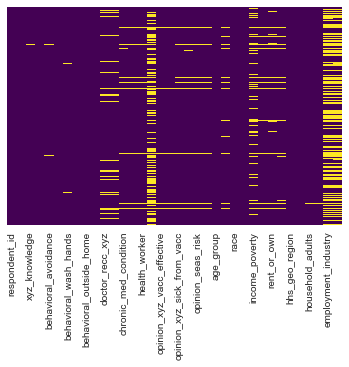

In [244]:
sns.heatmap(vaccine_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [245]:
vaccine_df.isna().any()

respondent_id                  False
xyz_concern                     True
xyz_knowledge                   True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_xyz                 True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_xyz_vacc_effective      True
opinion_xyz_risk                True
opinion_xyz_sick_from_vacc      True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
m

C:\Users\stats\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health_insurance', ylabel='count'>

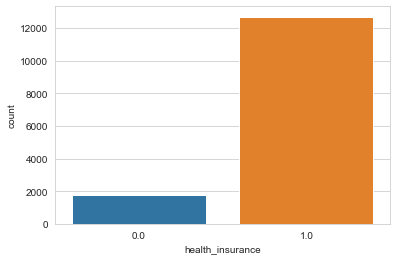

In [246]:
sns.countplot(vaccine_df['health_insurance'])

In [247]:
def impute_health_ins(cols):
    health=cols[0]
    if pd.isna(health):
        return 1
    else:
        return health
    

vaccine_df['health_insurance'] = vaccine_df[['health_insurance']].apply(impute_health_ins,axis=1)

In [248]:
vaccine_df.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance                   0
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<AxesSubplot:>

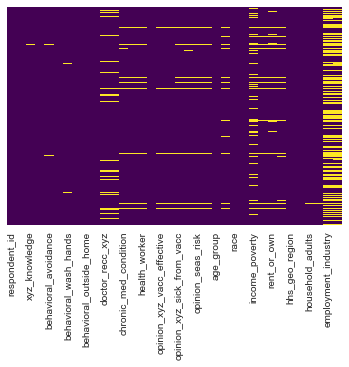

In [249]:
sns.heatmap(vaccine_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\stats\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employment_industry', ylabel='count'>

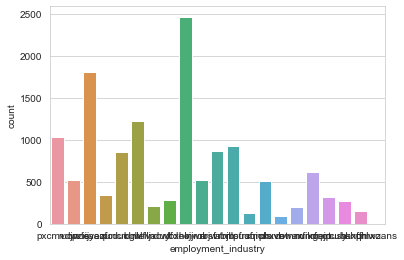

In [250]:
sns.countplot(vaccine_df['employment_industry'])

In [251]:
vaccine_df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [252]:
vaccine_df['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

<AxesSubplot:xlabel='employment_status', ylabel='count'>

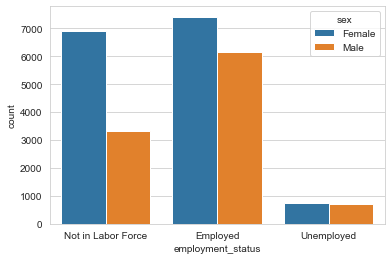

In [253]:
sns.set_style('whitegrid')
sns.countplot(x=vaccine_df['employment_status'],hue=vaccine_df['sex'])

<AxesSubplot:xlabel='employment_status', ylabel='count'>

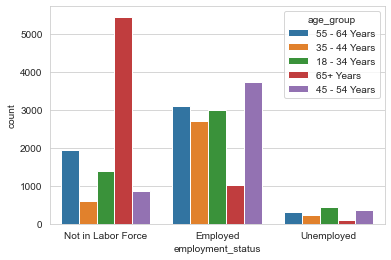

In [254]:
sns.countplot(x=vaccine_df['employment_status'],hue=vaccine_df['age_group'])

C:\Users\stats\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

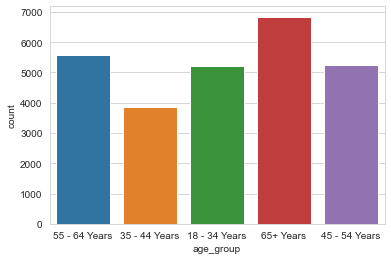

In [255]:
sns.countplot(vaccine_df['age_group'])

In [256]:
vaccine_df['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [257]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(vaccine_df['age_group'])
vaccine_df['age_group'] = label_encoder.transform(vaccine_df['age_group'])

In [258]:
vaccine_df['age_group'].unique()

array([3, 1, 0, 4, 2])

In [259]:
vaccine_df['age_group'].value_counts()

4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_group, dtype: int64

In [260]:
vaccine_df['age_group'].value_counts()

4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_group, dtype: int64

In [261]:
vaccine_df['employment_status'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [262]:
vaccine_df['employment_status'].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [263]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(vaccine_df['employment_status'])
vaccine_df['employment_status'] = label_encoder.transform(vaccine_df['employment_status'])

In [264]:
vaccine_df['employment_status'].unique()

array([1, 0, 2, 3])

In [265]:
vaccine_df['employment_status'].value_counts()

0    13560
1    10231
3     1463
2     1453
Name: employment_status, dtype: int64

In [266]:
vaccine_df[vaccine_df['employment_status']==3]['age_group'].value_counts()

0    405
1    310
2    277
4    274
3    197
Name: age_group, dtype: int64

In [267]:
def impute_emp_stat(cols):
    emp=cols[0]
    age=cols[1]
    if pd.isna(emp):
        if age==0:
            return 1
        else:
            return 0
    else:
        return age
    

vaccine_df['employment_status'] = vaccine_df[['employment_status','age_group']].apply(impute_emp_stat,axis=1)

In [268]:
vaccine_df.drop(['employment_occupation','employment_industry'], axis=1,inplace=True)

<AxesSubplot:>

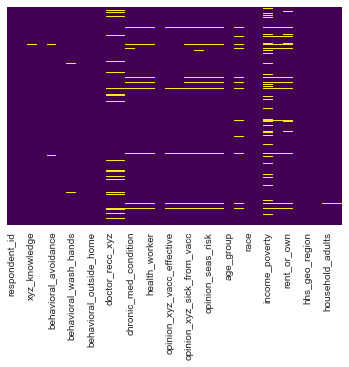

In [269]:
sns.heatmap(vaccine_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [270]:
vaccine_df.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [271]:
vaccine_df.xyz_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: xyz_concern, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

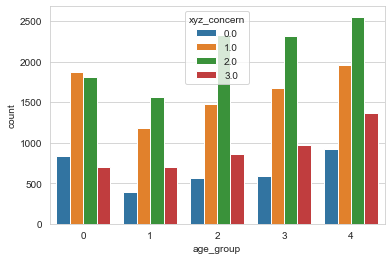

In [273]:
sns.countplot(x=vaccine_df['age_group'],hue=vaccine_df['xyz_concern'])

<AxesSubplot:xlabel='age_group', ylabel='count'>

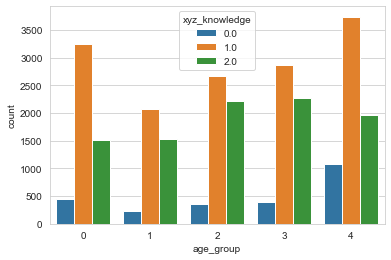

In [274]:
sns.countplot(x=vaccine_df['age_group'],hue=vaccine_df['xyz_knowledge'])

<AxesSubplot:xlabel='sex', ylabel='count'>

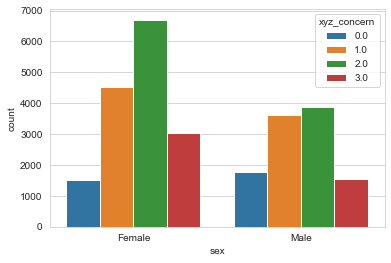

In [275]:
sns.countplot(x=vaccine_df['sex'],hue=vaccine_df['xyz_concern'])

<AxesSubplot:xlabel='sex', ylabel='count'>

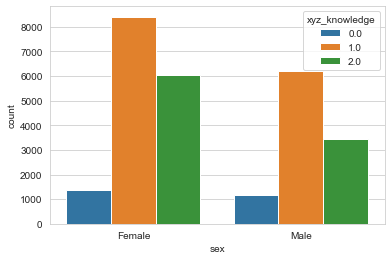

In [276]:
sns.countplot(x=vaccine_df['sex'],hue=vaccine_df['xyz_knowledge'])

In [277]:
vaccine_df['xyz_concern'] = vaccine_df['xyz_concern'].fillna(vaccine_df['xyz_concern'].mode()[0])
vaccine_df['xyz_knowledge'] = vaccine_df['xyz_knowledge'].fillna(vaccine_df['xyz_knowledge'].mode()[0])
vaccine_df['behavioral_antiviral_meds'] = vaccine_df['behavioral_antiviral_meds'].fillna(vaccine_df['behavioral_antiviral_meds'].mode()[0])
vaccine_df['behavioral_avoidance'] = vaccine_df['behavioral_avoidance'].fillna(vaccine_df['behavioral_avoidance'].mode()[0])
vaccine_df['behavioral_face_mask'] = vaccine_df['behavioral_face_mask'].fillna(vaccine_df['behavioral_face_mask'].mode()[0])
vaccine_df['behavioral_wash_hands'] = vaccine_df['behavioral_wash_hands'].fillna(vaccine_df['behavioral_wash_hands'].mode()[0])
vaccine_df['behavioral_large_gatherings'] = vaccine_df['behavioral_large_gatherings'].fillna(vaccine_df['behavioral_large_gatherings'].mode()[0])
vaccine_df['behavioral_outside_home'] = vaccine_df['behavioral_outside_home'].fillna(vaccine_df['behavioral_outside_home'].mode()[0])
vaccine_df['behavioral_touch_face'] = vaccine_df['behavioral_touch_face'].fillna(vaccine_df['behavioral_touch_face'].mode()[0])
vaccine_df['doctor_recc_xyz'] = vaccine_df['doctor_recc_xyz'].fillna(vaccine_df['doctor_recc_xyz'].mode()[0])
vaccine_df['doctor_recc_seasonal'] = vaccine_df['doctor_recc_seasonal'].fillna(vaccine_df['doctor_recc_seasonal'].mode()[0])
vaccine_df['chronic_med_condition'] = vaccine_df['chronic_med_condition'].fillna(vaccine_df['chronic_med_condition'].mode()[0])
vaccine_df['child_under_6_months'] = vaccine_df['child_under_6_months'].fillna(vaccine_df['child_under_6_months'].mode()[0])
vaccine_df['health_worker'] = vaccine_df['health_worker'].fillna(vaccine_df['health_worker'].mode()[0])
vaccine_df['opinion_xyz_vacc_effective'] = vaccine_df['opinion_xyz_vacc_effective'].fillna(vaccine_df['opinion_xyz_vacc_effective'].mode()[0])
vaccine_df['opinion_xyz_risk'] = vaccine_df['opinion_xyz_risk'].fillna(vaccine_df['opinion_xyz_risk'].mode()[0])
vaccine_df['opinion_xyz_sick_from_vacc'] = vaccine_df['opinion_xyz_sick_from_vacc'].fillna(vaccine_df['opinion_xyz_sick_from_vacc'].mode()[0])
vaccine_df['opinion_seas_vacc_effective'] = vaccine_df['opinion_seas_vacc_effective'].fillna(vaccine_df['opinion_seas_vacc_effective'].mode()[0])
vaccine_df['opinion_seas_risk'] = vaccine_df['opinion_seas_risk'].fillna(vaccine_df['opinion_seas_risk'].mode()[0])
vaccine_df['opinion_seas_sick_from_vacc'] = vaccine_df['opinion_seas_sick_from_vacc'].fillna(vaccine_df['opinion_seas_sick_from_vacc'].mode()[0])
vaccine_df['education'] = vaccine_df['education'].fillna(vaccine_df['education'].mode()[0])
vaccine_df['income_poverty'] = vaccine_df['income_poverty'].fillna(vaccine_df['income_poverty'].mode()[0])
vaccine_df['marital_status'] = vaccine_df['marital_status'].fillna(vaccine_df['marital_status'].mode()[0])
vaccine_df['rent_or_own'] = vaccine_df['rent_or_own'].fillna(vaccine_df['rent_or_own'].mode()[0])
vaccine_df['household_adults'] = vaccine_df['household_adults'].fillna(vaccine_df['household_adults'].mode()[0])
vaccine_df['household_children'] = vaccine_df['household_children'].fillna(vaccine_df['household_children'].mode()[0])


<AxesSubplot:>

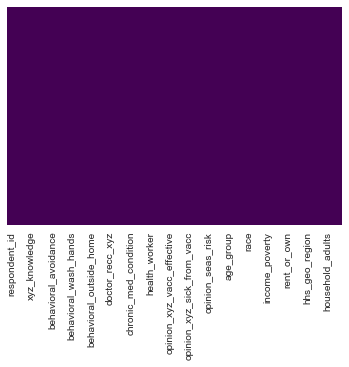

In [278]:
sns.heatmap(vaccine_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [279]:
vaccine_df['education'] = label_encoder.fit_transform(vaccine_df['education'])
vaccine_df['race'] = label_encoder.fit_transform(vaccine_df['race'])
vaccine_df['sex'] = label_encoder.fit_transform(vaccine_df['sex'])
vaccine_df['income_poverty'] = label_encoder.fit_transform(vaccine_df['income_poverty'])
vaccine_df['marital_status'] = label_encoder.fit_transform(vaccine_df['marital_status'])
vaccine_df['rent_or_own'] = label_encoder.fit_transform(vaccine_df['rent_or_own'])
vaccine_df['hhs_geo_region'] = label_encoder.fit_transform(vaccine_df['hhs_geo_region'])
vaccine_df['census_msa'] = label_encoder.fit_transform(vaccine_df['census_msa'])



In [280]:
vaccine_df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int32
education                        int32
race                             int32
sex                      

In [288]:
target_df = pd.read_csv(os.path.join('training_set_labels.csv'), delimiter=',')
target_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [330]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
vaccine_df_scaled=scaler.fit_transform(vaccine_df)

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
#

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(vaccine_df_scaled,target_df,test_size=.20, train_size=.80, random_state=20, shuffle=True, stratify=None)

In [389]:
from sklearn import linear_model
logr1 = linear_model.LogisticRegression()
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
#X, y = make_multilabel_classification(random_state=0)
clf = MultiOutputClassifier(logr1).fit(X_train, y_train)
# get a list of n_output containing probability arrays of shape
# (n_samples, n_classes)
y_pred = clf.predict_proba(X_test)
# extract the positive columns for each output
y_pred = np.transpose([pred[:, 1] for pred in y_pred])
roc_auc_score(y_test, y_pred, average=None)


KeyboardInterrupt



In [314]:
from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X_train, y_train)
roc_auc_score(y_test, clf.decision_function(X_test), average=None)

ValueError: Multioutput target data is not supported with label binarization

In [332]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test =train_test_split(vaccine_df_scaled,target_df['xyz_vaccine'],test_size=.20, train_size=.80, random_state=15, shuffle=True, stratify=None)

In [333]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test =train_test_split(vaccine_df,target_df['seasonal_vaccine'],test_size=.20, train_size=.80, random_state=15, shuffle=True, stratify=None)

In [374]:
from sklearn import linear_model
model1 = linear_model.LogisticRegression()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)

roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])


0.8354089614479415

In [375]:
model1.predict_proba(X1_test)[:, 1]

array([0.01719248, 0.0714786 , 0.15953416, ..., 0.17246095, 0.05133321,
       0.17475444])

In [349]:
from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X1_train, y1_train)
roc_auc_score(y1_test, clf.decision_function(X1_test), average=None)

0.8345194213490866

In [379]:
clf.decision_function(X1_test)

array([-1.10503531, -0.86135716, -0.66340408, ..., -0.58084223,
       -0.99720398, -0.61711676])

In [380]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])


0.8279957817846816

In [381]:
model1.predict_proba(X1_test)[:, 1]

array([0.01, 0.05, 0.15, ..., 0.3 , 0.17, 0.15])

In [382]:
from sklearn import ensemble
model1 = ensemble.AdaBoostClassifier()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])


0.8370065472721842

In [383]:
model1.predict_proba(X1_test)[:, 1]

array([0.48295249, 0.48353835, 0.49253628, ..., 0.4912776 , 0.48474082,
       0.49091799])

In [384]:
from sklearn import svm
model1 = svm.SVC(kernel='rbf',random_state=42)
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
#model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.decision_function(X1_test),average=None)

0.807680435569912

AttributeError: predict_proba is not available when  probability=False

In [358]:
from sklearn import svm
model1 = svm.LinearSVC()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
#model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.decision_function(X1_test),average=None)

C:\Users\stats\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8358795408057604

In [364]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])


0.6443544677363952

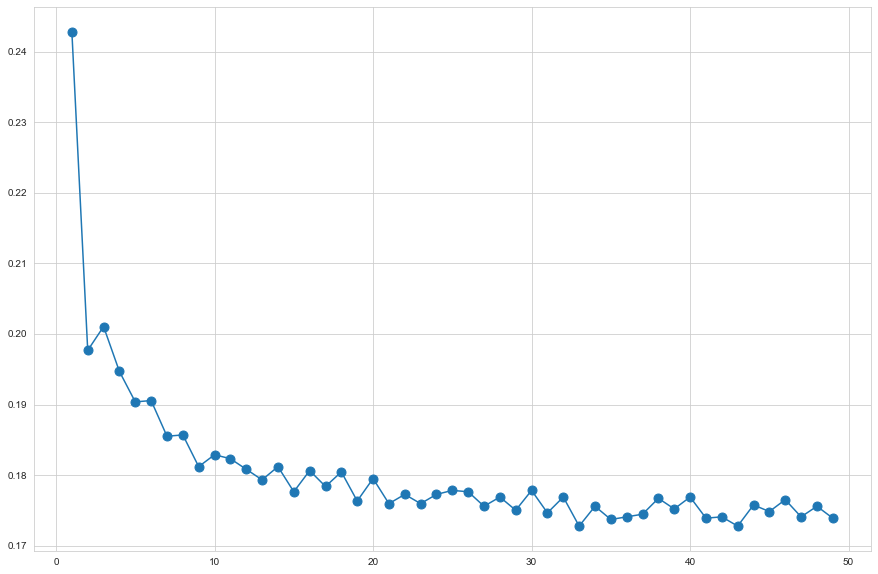

In [369]:
error_rate = []

for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred = knn.predict(X1_test)
    error_rate.append(np.mean(pred != y1_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [371]:
from sklearn import neighbors 
model1 = neighbors.KNeighborsClassifier(33)
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])

0.8027019339982392

In [390]:
vaccine_df.to_csv('clean_test_data.csv')